- Post Prruning
- Pre Prruning

In [50]:
import pandas as pd
import seaborn as sns

In [51]:
df=sns.load_dataset("iris")

In [52]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
df['species']=df['species'].map({'setosa':1,'versicolor':2,'virginica':3})

In [54]:
df['species'].value_counts()

1    50
2    50
3    50
Name: species, dtype: int64

In [55]:
x=df.iloc[:,:-1]
y=df['species']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.20)

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt=DecisionTreeClassifier(max_depth=2)

#POst Pruning

In [59]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

In [60]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [43, 38, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [0, 38, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

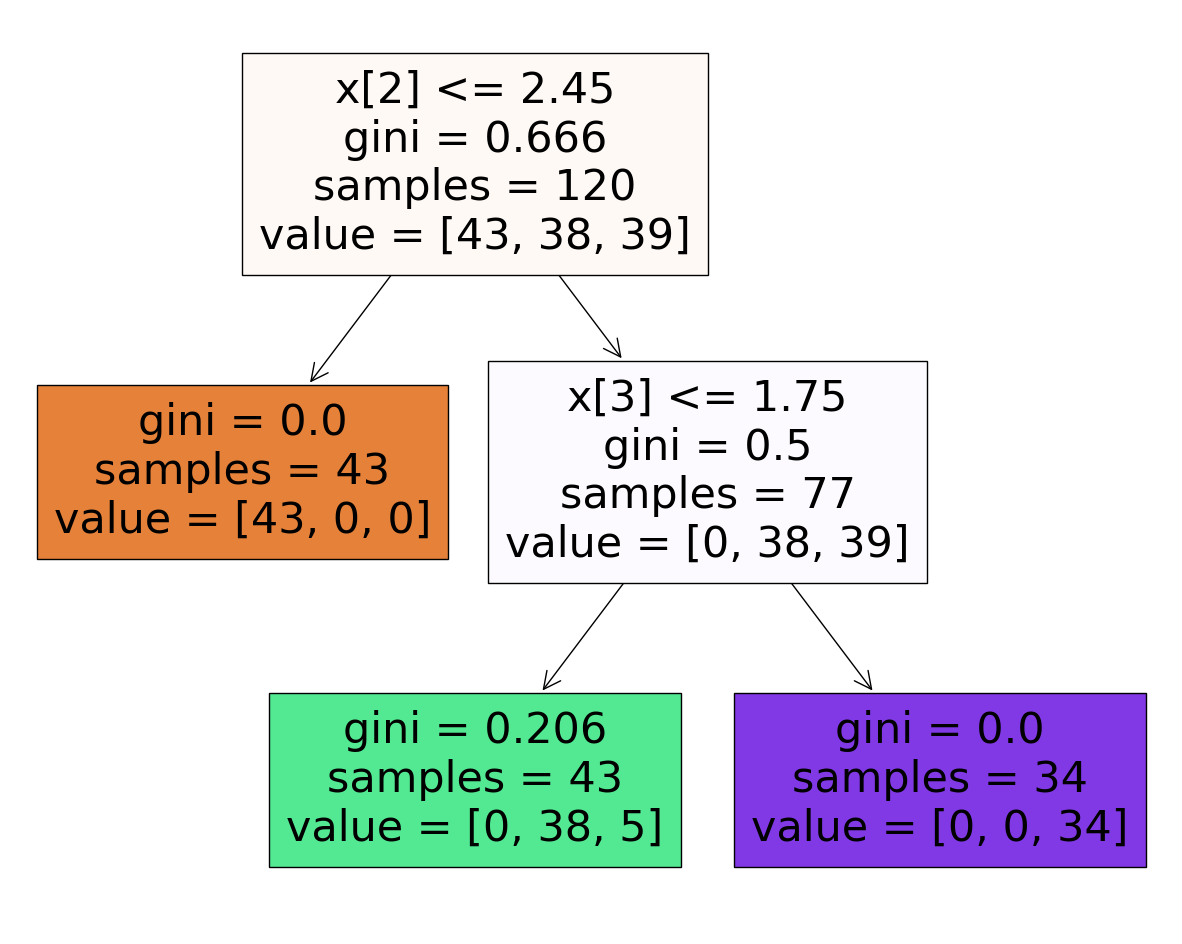

In [61]:
plt.figure(figsize=(15,12))
tree.plot_tree(dt,filled=True)

In [62]:
Y_pred=dt.predict(X_test)
Y_pred

array([2, 2, 1, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 1, 1, 3, 2, 3, 2, 1,
       1, 1, 1, 3, 3, 2, 3, 2])

In [63]:
from sklearn.metrics import accuracy_score, classification_report

In [64]:
accuracy_score(Y_test,Y_pred)

0.9666666666666667

#Pre-Pruning

In [ ]:
#Hyper parameter tuning

In [65]:
param={'criterion':['gini','entropy', 'log_loss'],'splitter':["best","random"],'max_depth':[1,2,3,4,5],'max_features':['auto','sqrt','log2']}

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()

In [77]:
grid=GridSearchCV(tree,param,cv=5,scoring='accuracy')

In [78]:
grid.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [79]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features='auto')

In [80]:
grid.best_score_

0.9666666666666668

In [81]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [83]:
y_pre=grid.predict(X_test)

In [84]:
accuracy_score(Y_test,y_pre)

0.9333333333333333

In [85]:
classification_report(Y_test,y_pre)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00         7\n           2       1.00      0.83      0.91        12\n           3       0.85      1.00      0.92        11\n\n    accuracy                           0.93        30\n   macro avg       0.95      0.94      0.94        30\nweighted avg       0.94      0.93      0.93        30\n'